In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import json
from datetime import datetime
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc #To evaluate our model
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joypy as joypy

In [2]:
#loading the data into pandas
url = "https://raw.githubusercontent.com/StephenJudeD/eBay-Shill-Bidding-Data-Machine-Learning-Visualization-/main/Ebay_ShillBiddingDataset.csv"
#df = pd.read_csv(url,index_col=7)
df_shill = pd.read_csv(url)

print(df_shill.head(5))


   Record_ID  Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
0          1         732     _***i         0.200000       0.400000   
1          2         732     g***r         0.024390       0.200000   
2          3         732     t***p         0.142857       0.200000   
3          4         732     7***n         0.100000       0.200000   
4          5         900     z***z         0.051282       0.222222   

   Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average  \
0                    0.0      0.000028           0.0                0.993593   
1                    0.0      0.013123           0.0                0.993593   
2                    0.0      0.003042           0.0                0.993593   
3                    0.0      0.097477           0.0                0.993593   
4                    0.0      0.001318           0.0                0.000000   

   Early_Bidding  Winning_Ratio  Auction_Duration  Class  
0       0.000028       0.666667        

In [3]:
df_shill.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [4]:
# apply the dtype attribute
result = df_shill.dtypes

print("Output:")
print(result)

Output:
Record_ID                   int64
Auction_ID                  int64
Bidder_ID                  object
Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
Class                       int64
dtype: object


In [5]:
#Searching for Missings,type of data and also known the shape of data
print(df_shill.info())

#Looking unique values
print(df_shill.nunique())
#Looking the data
print(df_shill.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB
None
Record_ID                 632

In [6]:
from pandas_profiling import ProfileReport

In [7]:
profile = ProfileReport(df_shill, title="Data Profile Report")
json_data = profile.to_json()
json_data = json.loads(json_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

**Figure 1: Correlation Plot using Seaborn**

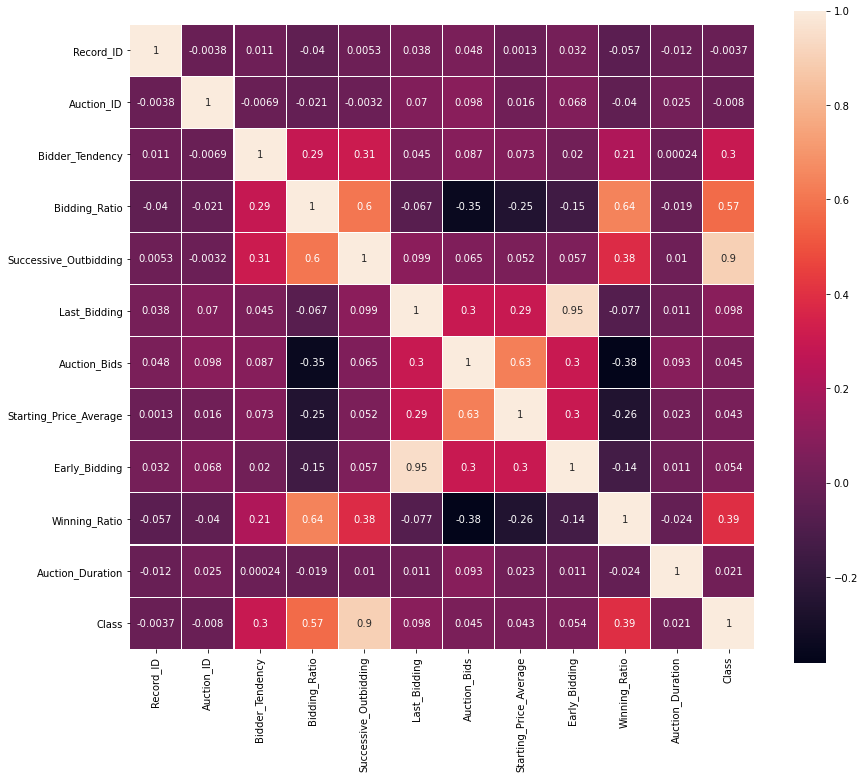

In [8]:
# creating a corr plot to help understand relationships
plt.figure(figsize=(14,12))
corr_plot = sns.heatmap(df_shill.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

**Figure 2: Correlation Plot using Seaborn**

<AxesSubplot:>

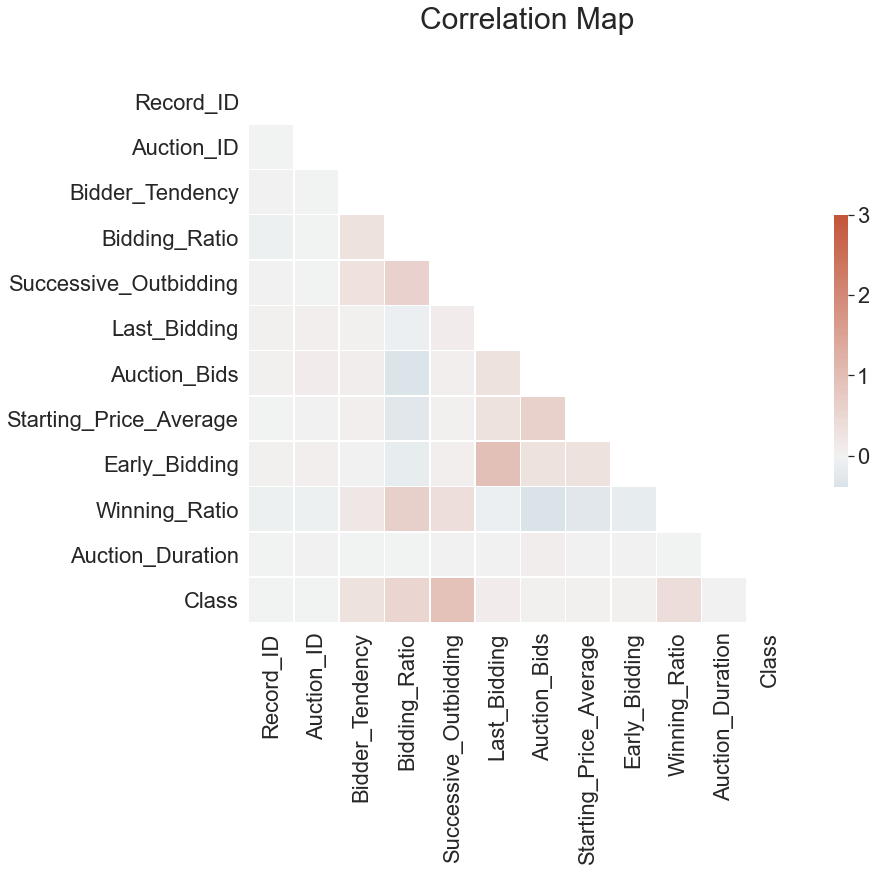

In [9]:
# another seaborn corr, different viewpoint - less detailed
sns.set(style="white", font_scale=2)

corr = df_shill.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15,10))
f.suptitle('Correlation Map', fontsize=30)

#cmap = sns.diverging_palette(220,10, as_cmap=True)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0,
          square=True, linewidth = .5, cbar_kws={"shrink": .5})

In [10]:
# Checking if there are any null cells in the dataset
df_shill.isnull().values.any()

False

In [11]:
# Remvoing variable columns
df_shill = df_shill[['Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class']]
df_shill.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [12]:
# apply the dtype attribute
result = df_shill.dtypes

print("Output:")
print(result)

Output:
Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
Class                       int64
dtype: object


**Figure 3 & 4: Boxplot & Violin Plot using Seaborn**

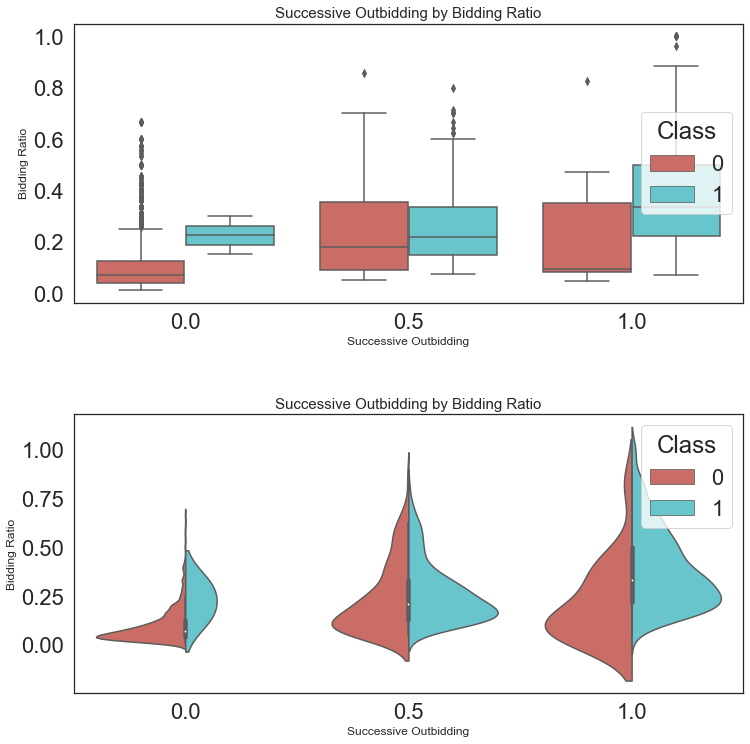

In [13]:
#Boxplot using Seaborn 
#Violin plot using Seaborn 

fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="Successive_Outbidding", y="Bidding_Ratio", data=df_shill, 
            palette="hls", ax=ax[0], hue="Class")
g1.set_title("Successive Outbidding by Bidding Ratio", fontsize=15)
g1.set_xlabel("Successive Outbidding", fontsize=12)
g1.set_ylabel("Bidding Ratio", fontsize=12)

g2 = sns.violinplot(x="Successive_Outbidding", y="Bidding_Ratio", data=df_shill, ax=ax[1],  
               hue="Class", split=True, palette="hls")
g2.set_title("Successive Outbidding by Bidding Ratio", fontsize=15)
g2.set_xlabel("Successive Outbidding", fontsize=12)
g2.set_ylabel("Bidding Ratio", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

plot9 = g2

**Figure 5 & 6: Bar Chart & Line Graph using Seaborn**

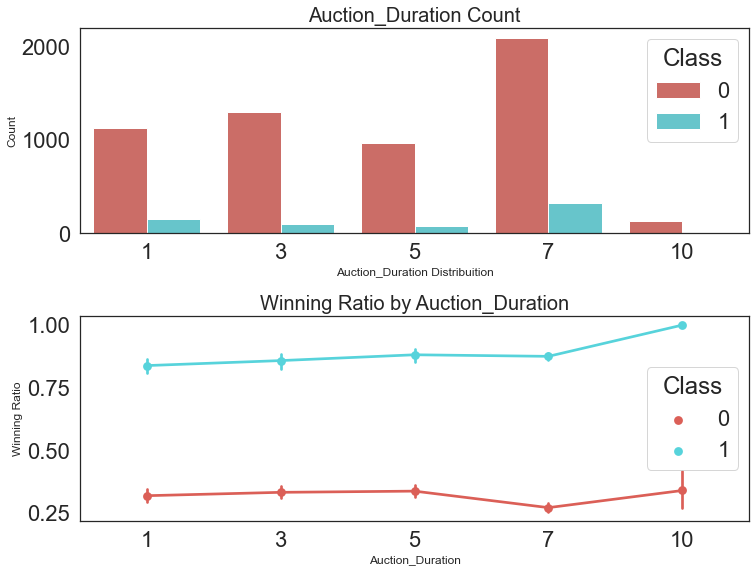

In [14]:
#Bar chart using Seaborn 
#Line graph using Seaborn 

plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Auction_Duration", data=df_shill, 
              palette="hls",  hue = "Class")
g.set_xlabel("Auction_Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Auction_Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Auction_Duration", y ="Winning_Ratio",data=df_shill,
                   hue="Class", palette="hls")
g1.set_xlabel("Auction_Duration", fontsize=12)
g1.set_ylabel("Winning Ratio", fontsize=12)
g1.set_title("Winning Ratio by Auction_Duration", fontsize=20)


plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

plot14 = g2

**Factor Analysis** 
Good for statistical plotting

In [15]:
#create seeprate dataframe 
#loading the data into pandas
url = "https://raw.githubusercontent.com/StephenJudeD/DataVisualization_MachineLearning/main/Ebay_ShillBiddingDataset.csv"
#df = pd.read_csv(url,index_col=7)
dfa = pd.read_csv(url)

print(dfa.head(5))

   Record_ID  Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
0          1         732     _***i         0.200000       0.400000   
1          2         732     g***r         0.024390       0.200000   
2          3         732     t***p         0.142857       0.200000   
3          4         732     7***n         0.100000       0.200000   
4          5         900     z***z         0.051282       0.222222   

   Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average  \
0                    0.0      0.000028           0.0                0.993593   
1                    0.0      0.013123           0.0                0.993593   
2                    0.0      0.003042           0.0                0.993593   
3                    0.0      0.097477           0.0                0.993593   
4                    0.0      0.001318           0.0                0.000000   

   Early_Bidding  Winning_Ratio  Auction_Duration  Class  
0       0.000028       0.666667        

In [16]:
# Remvoing variable columns
dfa = dfa[['Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class']]
dfa.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [17]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(dfa)

C:\Users\steph\Anaconda3\lib\site-packages\factor_analyzer\utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [18]:
kmo_model

0.6604960953303409

In [19]:
from factor_analyzer import FactorAnalyzer

In [20]:
fa = FactorAnalyzer()
fa.fit(dfa)
eigen_values, vectors = fa.get_eigenvalues()

In [21]:
ev, v = fa.get_eigenvalues()
ev

array([3.03405188, 2.51671359, 1.28882428, 0.99193475, 0.81996288,
       0.57387224, 0.34370977, 0.29049212, 0.09515578, 0.04528271])

**Figure 7: Scree plot to see optimal factors**

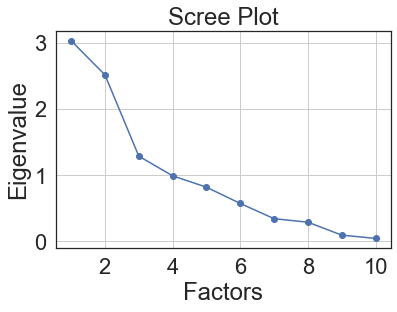

In [22]:
# Create scree plot using matplotlib
#Create an optimal number of factors i.e. 4 in our case. 
#Then, we have to interpret the factors by making use of loadings, variance, and commonalities.
plt.scatter(range(1,dfa.shape[1]+1),ev)
plt.plot(range(1,dfa.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [23]:
#Loadings indicate how much a factor explains a variable.
#The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has an influence on these variables.
#Values close to 0 indicates that the factor has a lower influencer on the variable.
fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(dfa)
print(pd.DataFrame(fa.loadings_,index=dfa.columns))

                               0         1         2         3
Bidder_Tendency         0.016489  0.198278  0.128976  0.341931
Bidding_Ratio          -0.063754  0.406377 -0.291646  0.731025
Successive_Outbidding   0.042894  0.930071  0.086873  0.340151
Last_Bidding            0.960709  0.039439  0.147846  0.024693
Auction_Bids            0.163832  0.008962  0.942909 -0.095698
Starting_Price_Average  0.212621  0.018288  0.623443 -0.078161
Early_Bidding           0.967746  0.029272  0.143617 -0.072937
Winning_Ratio          -0.052863  0.226522 -0.333876  0.618017
Auction_Duration       -0.001957  0.011455  0.078261 -0.004206
Class                   0.047723  0.825717  0.069423  0.361846


In [24]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3
Variance          1.942796  1.805567  1.551900  1.301108
Proportional Var  0.194280  0.180557  0.155190  0.130111
Cumulative Var    0.194280  0.374836  0.530026  0.660137


In [25]:
print(pd.DataFrame(fa.get_communalities(),index=dfa.columns,columns=['Communalities']))

                        Communalities
Bidder_Tendency              0.173137
Bidding_Ratio                0.788662
Successive_Outbidding        0.990122
Last_Bidding                 0.946986
Auction_Bids                 0.925156
Starting_Price_Average       0.440333
Early_Bidding                0.963335
Winning_Ratio                0.547525
Auction_Duration             0.006277
Class                        0.819837


**Figure 8: Joyplot using Class**

<Figure size 1280x800 with 0 Axes>

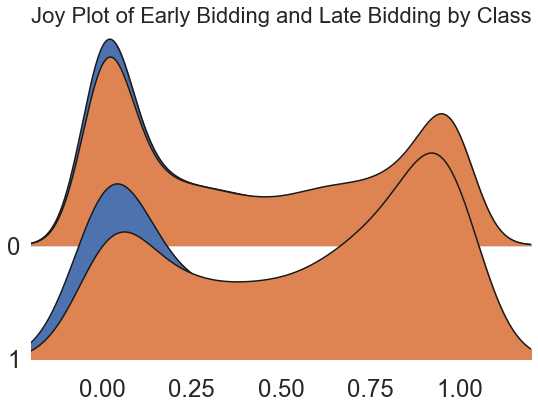

In [26]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(dfa, column=['Early_Bidding', 'Last_Bidding'], by="Class", ylim='own', figsize=(8,6))

# Decoration
plt.title('Joy Plot of Early Bidding and Late Bidding by Class', fontsize=22)
plt.show()

**Figure 9: Pairplot with Seaborn for correalations**

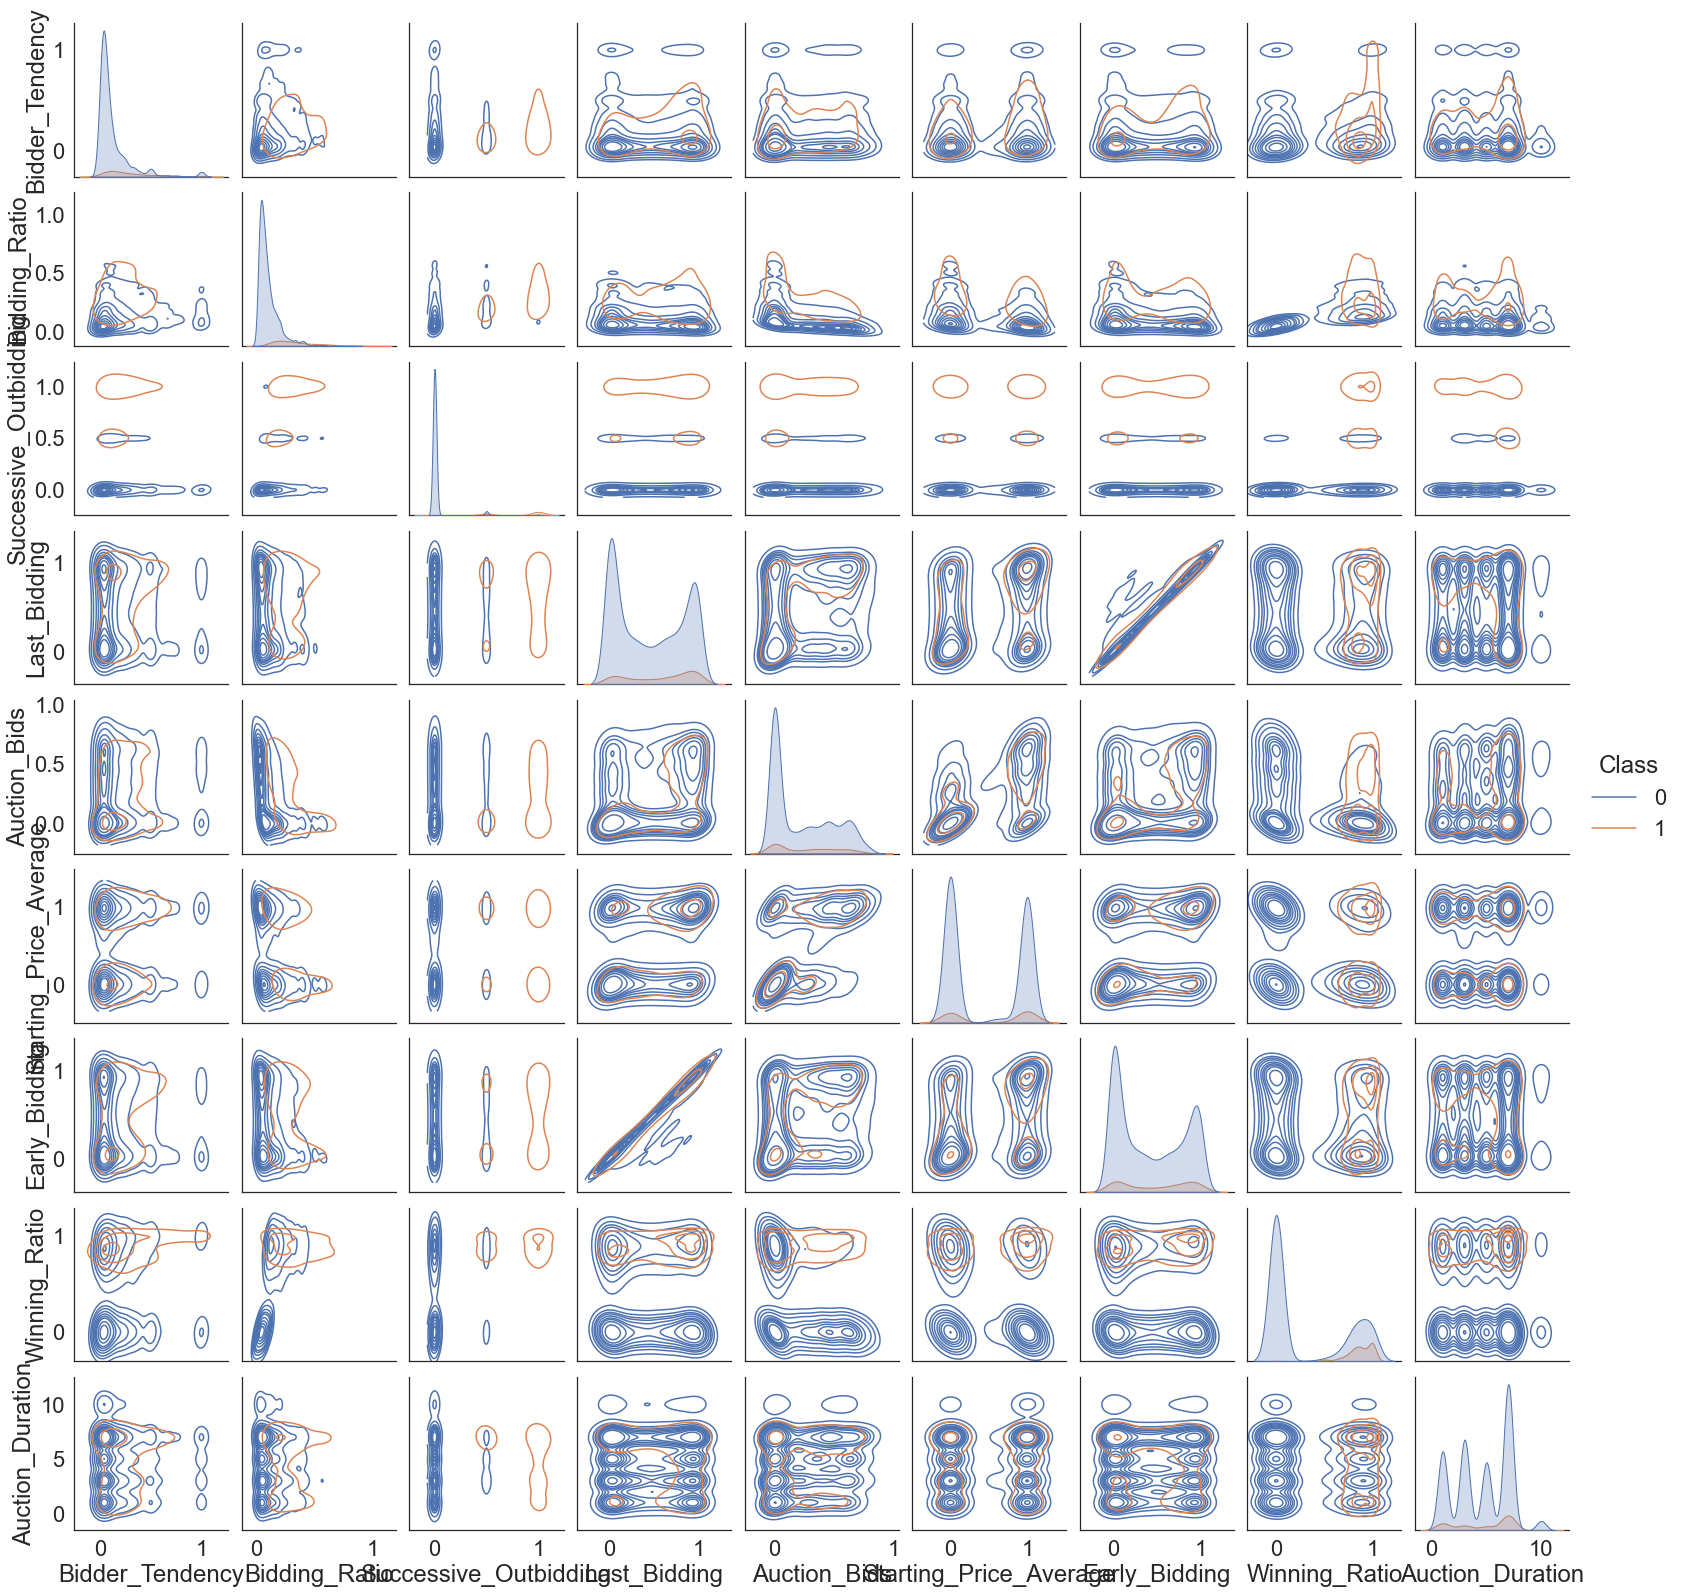

In [27]:
sns.pairplot(dfa, kind="kde", hue="Class", palette = "deep")

**Data Preperation for the Model**

In [28]:
#Preprocessing
#The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
#The following script performs this task:

X = df_shill.drop('Class', 1)
y = df_shill['Class']

#The script above stores the feature sets into the X variable and the series of corresponding labels in to the y variable.

In [29]:
#The next preprocessing step is to divide data into training and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Before modeling, we need to “center” and “standardize” our data by scaling. We scale to control for the fact that different variables are measured on different scales. We scale so that each predictor can have a “fair fight” against each other in deciding importance

In [30]:
#PCA performs best with a normalized feature set. 
#We will perform standard scalar normalization to normalize our feature set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**PCA (Principal Component Analysis)**

Using dimension reduction, we can approximate the original dataset with fewer variables, while reducing computational power to run our model. Using PCA, we can study the cumulative explained variance ratio of these features to understand which features explain the most variance in the data.

In [31]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#In the code above, we create a PCA object named pca. We did not specify the number of components in the constructor. 
#Hence, all ten features in the feature set will be returned for both the training and test sets.

In [32]:
#The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
#Execute the following line of code to find the "explained variance ratio".
explained_varience = pca.explained_variance_ratio_
explained_varience

array([0.3068798 , 0.23494482, 0.13884235, 0.11068676, 0.08016949,
       0.05739195, 0.03816346, 0.02798867, 0.0049327 ])

**Figure 10: Calculate N_Components**

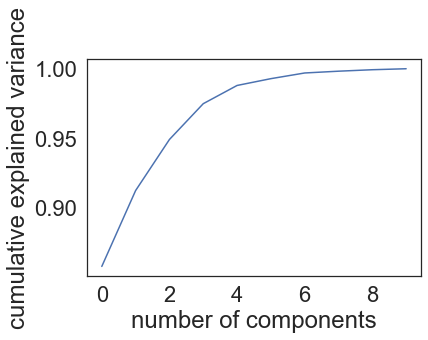

In [33]:
#This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. 
#For example, we see that with the digits the first 2 components contain approximately 94% of the variance

pca = PCA().fit(df_shill)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [34]:
#Let's first try to use 3 principal componens to train our algorithm as per the above 

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [35]:
#In this case we'll use random forest classification for making the predictions.

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=5, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [36]:
#In this case we'll use random forest classification for making the predictions.

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=5, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1669   33]
 [  41  154]]
0.9609910384818134


**Data Prepeartion for Decsion Tree Model**

In [38]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
df_cat = df_shill.select_dtypes(include=['float','integer'])
df_cat.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


In [39]:
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)
df_cat.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,320,317,0,34,0,17,36,12,2,0
1,61,216,0,717,0,17,800,66,2,0
2,279,216,0,407,0,17,454,71,2,0
3,225,216,0,1434,0,17,1553,71,2,0
4,139,231,0,282,0,0,315,3,3,0


In [40]:
# concat df_categorical with original df
df_shill = df_shill.drop(df_cat.columns, axis=1)
df_shill = pd.concat([df_shill, df_cat], axis=1)
df_shill.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,320,317,0,34,0,17,36,12,2,0
1,61,216,0,717,0,17,800,66,2,0
2,279,216,0,407,0,17,454,71,2,0
3,225,216,0,1434,0,17,1553,71,2,0
4,139,231,0,282,0,0,315,3,3,0


In [41]:
# look at column types
df_shill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Bidder_Tendency         6321 non-null   int64
 1   Bidding_Ratio           6321 non-null   int64
 2   Successive_Outbidding   6321 non-null   int64
 3   Last_Bidding            6321 non-null   int64
 4   Auction_Bids            6321 non-null   int64
 5   Starting_Price_Average  6321 non-null   int64
 6   Early_Bidding           6321 non-null   int64
 7   Winning_Ratio           6321 non-null   int64
 8   Auction_Duration        6321 non-null   int64
 9   Class                   6321 non-null   int64
dtypes: int64(10)
memory usage: 494.0 KB


In [42]:
# convert target variable Class to categorical
df_shill['Class'] = df_shill['Class'].astype('category')

Model Building and Evaluation Let's first build a decision tree with default hyperparameters. 
Then we'll use cross-validation to tune them.



In [43]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [44]:
# Putting feature variable to X
X = df_shill.drop('Class',axis=1)

# Putting response variable to y
y = df_shill['Class']

In [45]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration
134,349,115,0,179,0,0,201,0,0
2517,153,247,0,2092,0,0,1864,43,1
1757,91,87,0,4382,44,15,3712,0,3
1423,109,55,0,48,6,0,53,0,1
5670,488,369,2,1886,0,0,1026,71,3


**Decision Tree Model**

We can now build our model, The goal is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data

In [46]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [47]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1696
           1       1.00      0.97      0.98       201

    accuracy                           1.00      1897
   macro avg       1.00      0.99      0.99      1897
weighted avg       1.00      1.00      1.00      1897



In [48]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[1696    0]
 [   6  195]]
0.9968371112282551


In [49]:
#Plotting the Decision Tree - We need the graphviz library to plot a tree
X_train.shape, X_test.shape

((4424, 9), (1897, 9))

In [50]:
feature_cols = ['Successive_Outbidding','Bidding_Ratio','Last_Bidding','Auction_Bids','Starting_Price_Average','Early_Bidding','Winning_Ratio','Auction_Duration','Class']
X = df_shill[feature_cols] # Features
y = df_shill.Class # Target variable

In [51]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [52]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9957828149710068


In [53]:
import os
os.environ["PATH"] += os.pathsep + (r'C:\Users\steph\Anaconda3\Library\bin\graphviz')

**Figure 11:Decision Tree Model using graphviz**

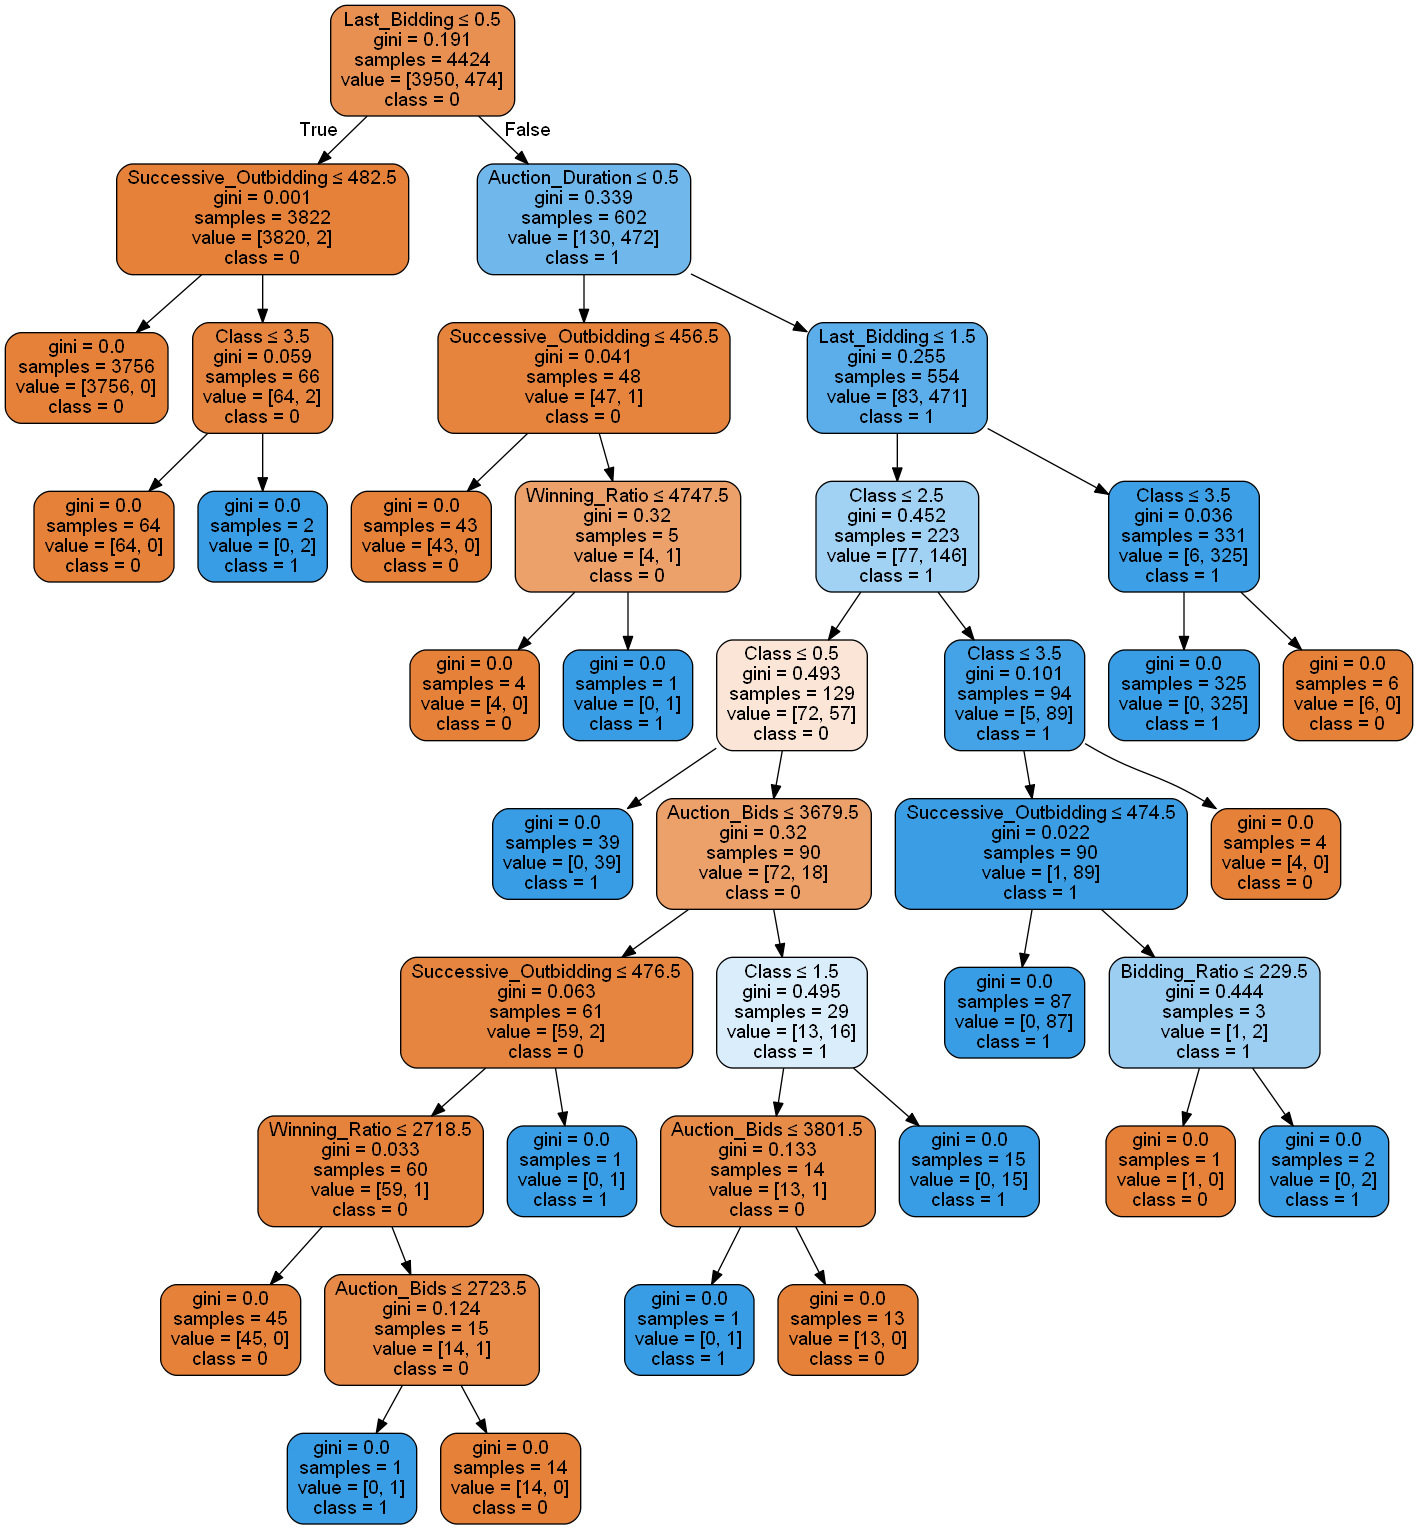

In [54]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('shill.png')
Image(graph.create_png())

**Grid Search to Find Optimal Hyperparameters**

I will now use GridSearchCV to find multiple optimal hyperparameters together, scikit-Learn’s GridSearchCV will do the heavy lifting

In [55]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 7

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 7 folds for each of 16 candidates, totalling 112 fits


GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [56]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005859,0.000833,0.001574,0.000497,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.977848,0.985759,0.987342,0.987342,0.984177,0.976266,0.969937,0.981239,0.006182,6
1,0.005568,0.000912,0.001585,0.000484,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.977848,0.987342,0.987342,0.987342,0.984177,0.976266,0.969937,0.981465,0.006369,5
2,0.004627,0.007320,0.002234,0.005473,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.974684,0.977848,0.966772,0.966772,0.977848,0.981013,0.958861,0.971971,0.007408,13
3,0.006007,0.001076,0.001860,0.000345,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.974684,0.977848,0.974684,0.966772,0.977848,0.981013,0.958861,0.973101,0.007127,9
4,0.006287,0.001156,0.001569,0.000730,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.977848,0.985759,0.987342,0.987342,0.984177,0.976266,0.969937,0.981239,0.006182,6
5,0.004465,0.007060,0.002235,0.005474,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.977848,0.985759,0.987342,0.987342,0.984177,0.976266,0.969937,0.981239,0.006182,6
6,0.004466,0.007061,0.002231,0.005465,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.974684,0.977848,0.966772,0.966772,0.977848,0.981013,0.958861,0.971971,0.007408,13
7,0.006700,0.007736,0.000000,0.000000,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.974684,0.977848,0.974684,0.966772,0.977848,0.981013,0.958861,0.973101,0.007127,9
8,0.006694,0.007730,0.000000,0.000000,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.977848,0.985759,0.987342,0.984177,0.988924,0.982595,0.969937,0.982369,0.006065,2
9,0.006696,0.007732,0.000000,0.000000,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.977848,0.985759,0.987342,0.984177,0.988924,0.982595,0.969937,0.982369,0.006065,2


In [57]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9825949367088607
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [58]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 50,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50, random_state=50)

In [59]:
# accuracy score
clf_entropy.score(X_test,y_test)

0.985239852398524

**Figure 12: Decision Tree Model with Entropy**

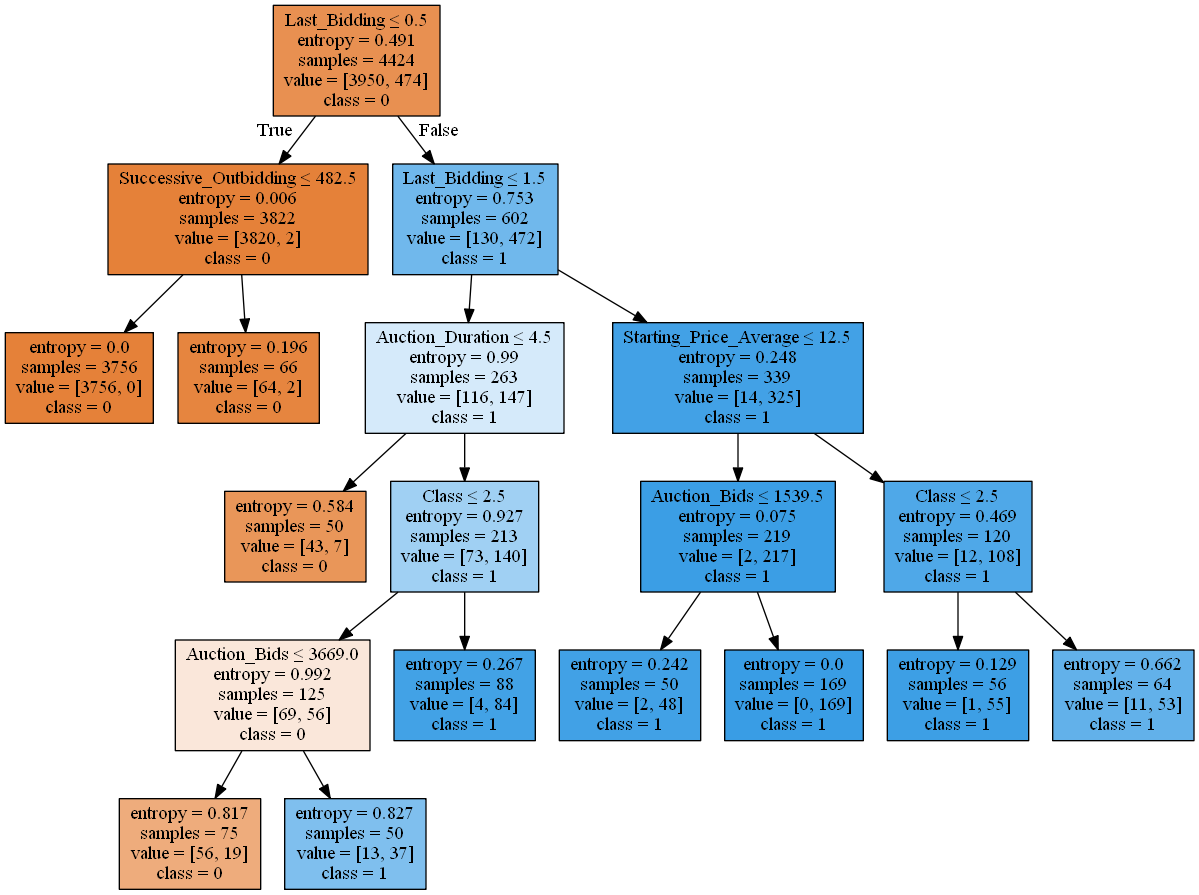

In [60]:
# plotting the tree
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=False,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('shill.png')
Image(graph.create_png())

In [61]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 50,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=50)

In [62]:
clf_gini.score(X_test,y_test)

0.9873484449130205

**Figure 13:Decision Tree Model with Gini**

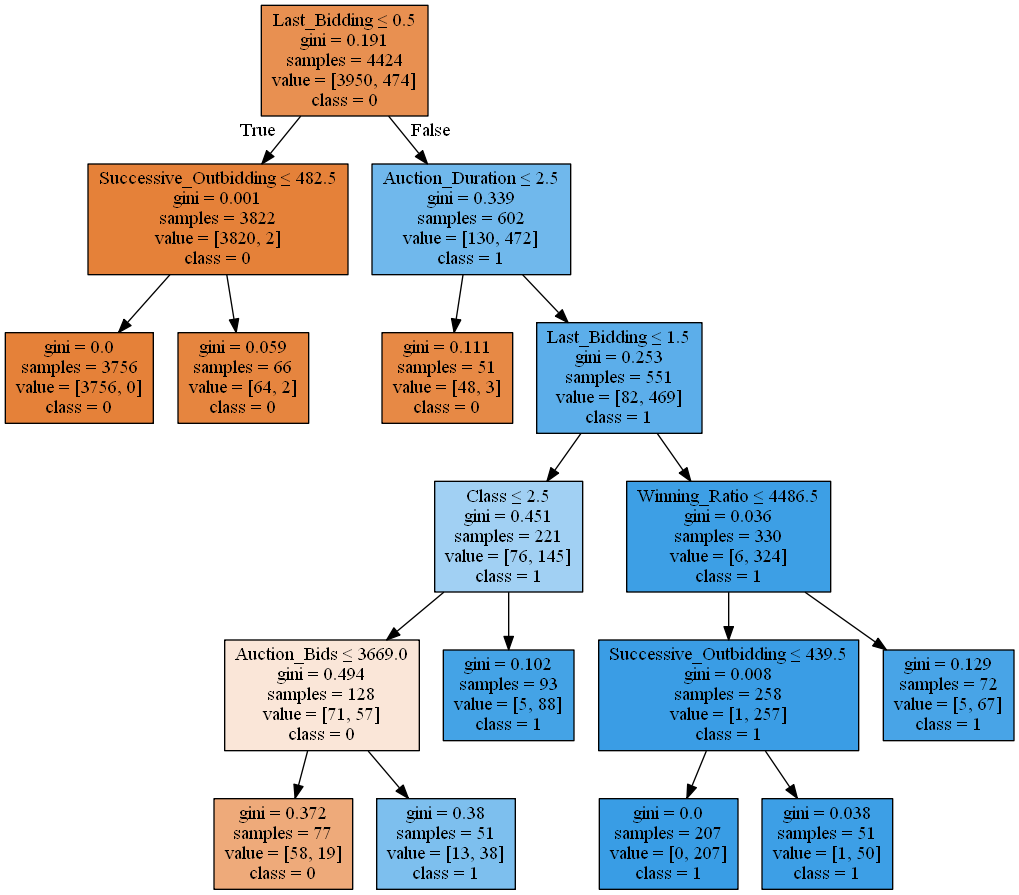

In [63]:
# plotting the tree
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=False,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('shill.png')
Image(graph.create_png())

**Figure 14: Optimal Clusters using Yellowbrick**

In [64]:
from yellowbrick.cluster import KElbowVisualizer

In [65]:
from sklearn.cluster import KMeans

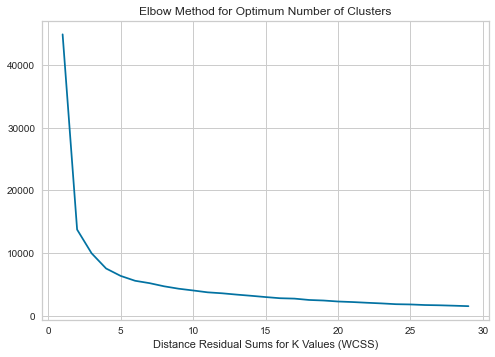

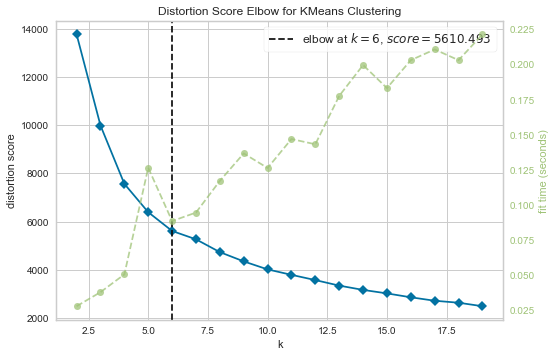

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
# KMeans Clustering
# reusing dfa from factor analysis 
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(dfa)
    ssd.append(kmeans.inertia_)

ssd

plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Residual Sums for K Values (WCSS)")
plt.title("Elbow Method for Optimum Number of Clusters")
plt.show()

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 20))
visu.fit(dfa)
visu.show()


In [67]:
kmeans = KMeans(n_clusters=6).fit(dfa)
clusters = kmeans.labels_

pd.DataFrame({"Customers": dfa.index, "Clusters": clusters})
dfa["cluster_no"] = clusters
dfa.head()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class,cluster_no
0,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0,2
1,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0,2
2,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0,2
3,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0,2
4,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0,5


In [68]:
dfa["cluster_no"] = dfa["cluster_no"] + 1
dfa.groupby("cluster_no").agg({"cluster_no": "count"})

,cluster_no
cluster_no,
1,1289
2,1174
3,1060
4,1408
5,137
6,1253


In [69]:
dfa.groupby("cluster_no").agg(np.mean)

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
cluster_no,,,,,,,,,,
1,0.143443,0.128782,0.099690,0.462411,0.212050,0.500774,0.431434,0.381218,1.0,0.119472
2,0.157793,0.087747,0.130750,0.598453,0.446761,0.979085,0.570959,0.212346,7.0,0.146508
3,0.141966,0.123585,0.087264,0.467603,0.240362,0.447820,0.431871,0.381067,5.0,0.080189
4,0.139465,0.132813,0.104759,0.451194,0.193679,0.430153,0.419257,0.371828,3.0,0.074574
5,0.116244,0.102190,0.062044,0.474643,0.292665,0.712362,0.457530,0.349613,10.0,0.014599
6,0.134139,0.164393,0.100160,0.345395,0.078668,0.012628,0.307376,0.485540,7.0,0.125299


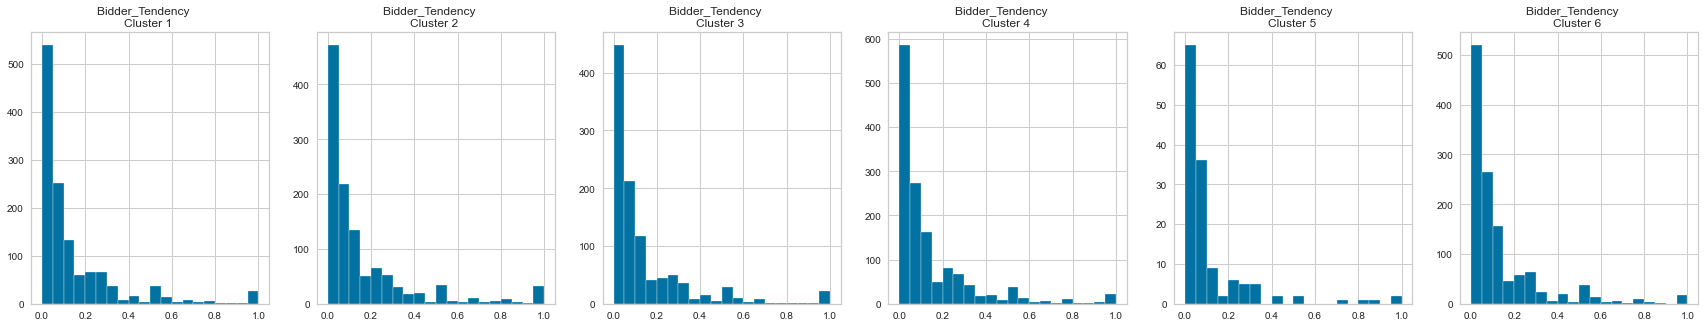

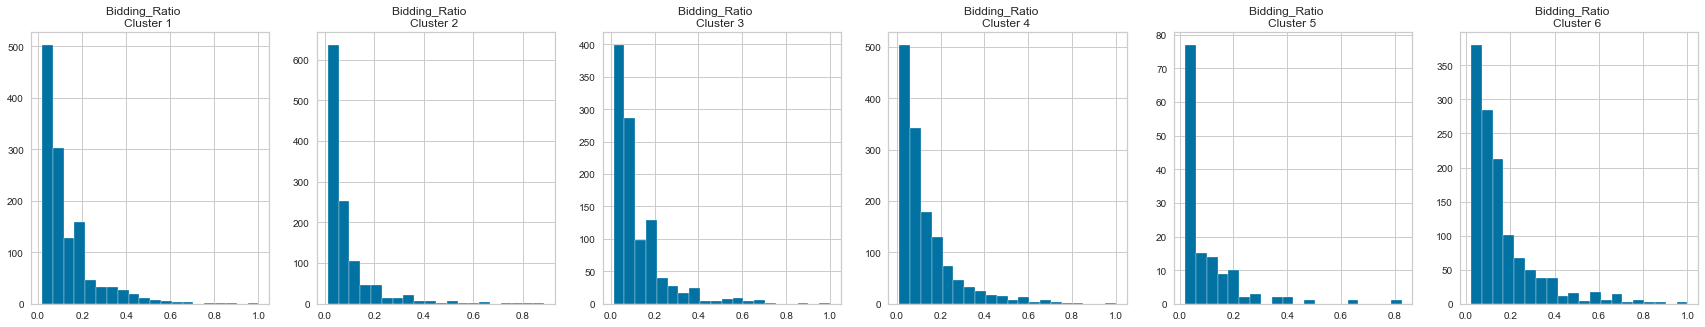

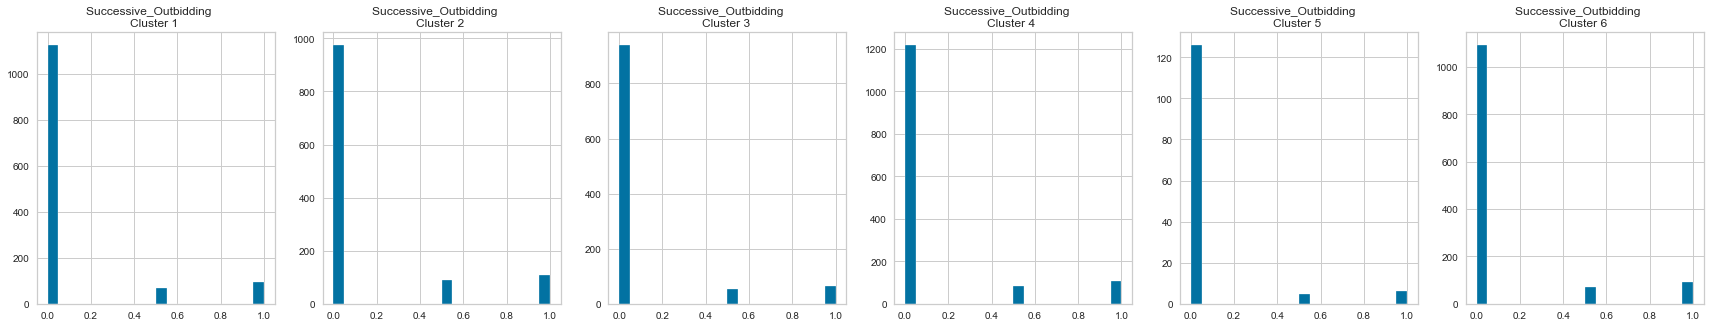

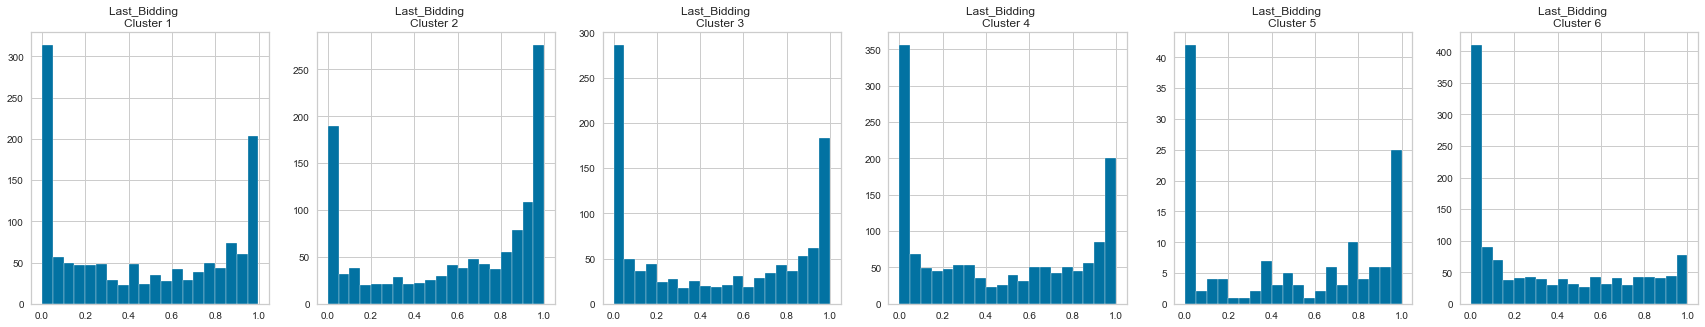

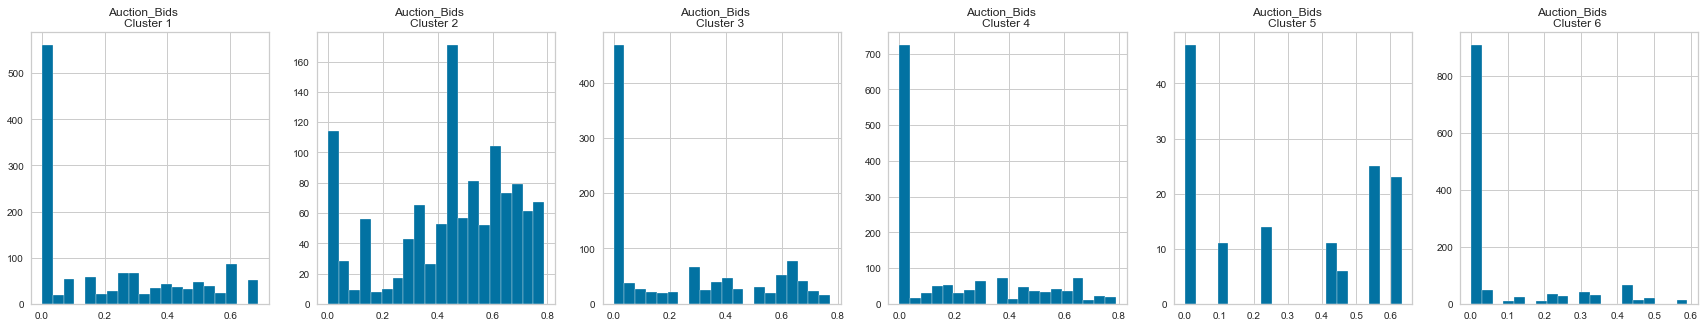

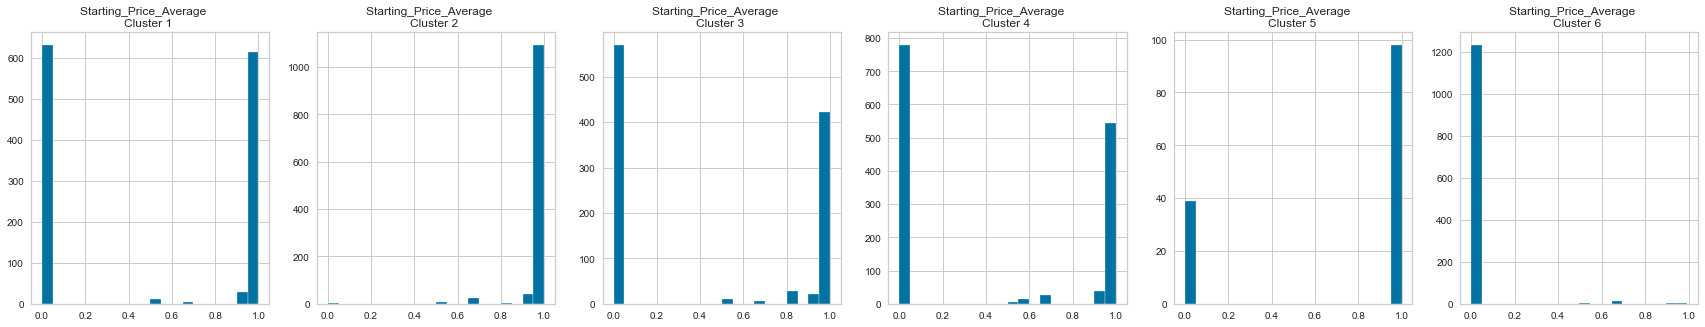

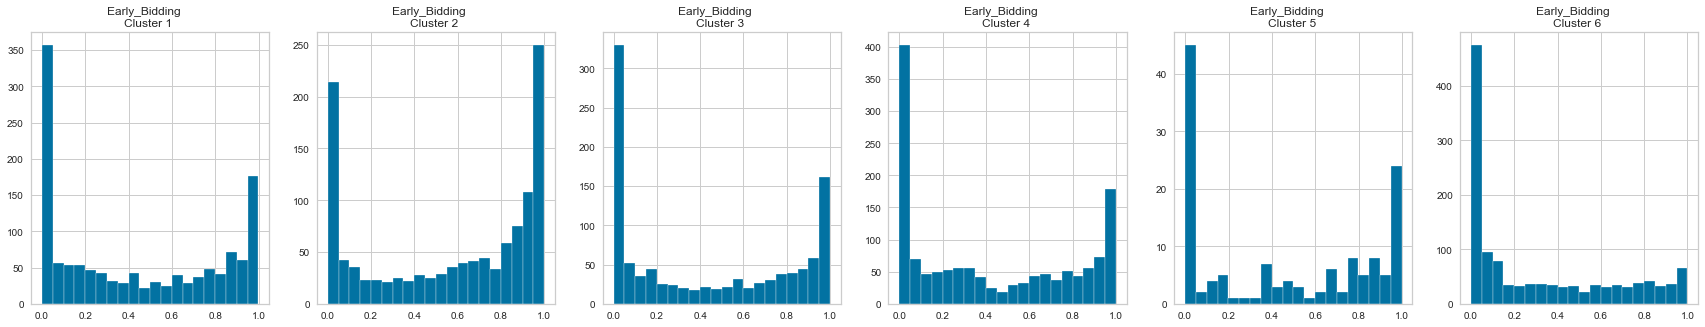

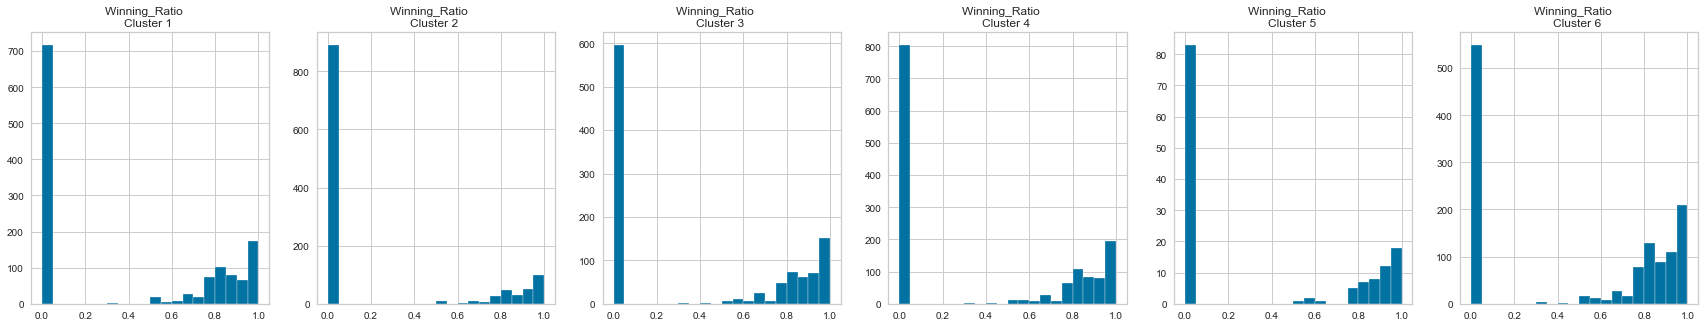

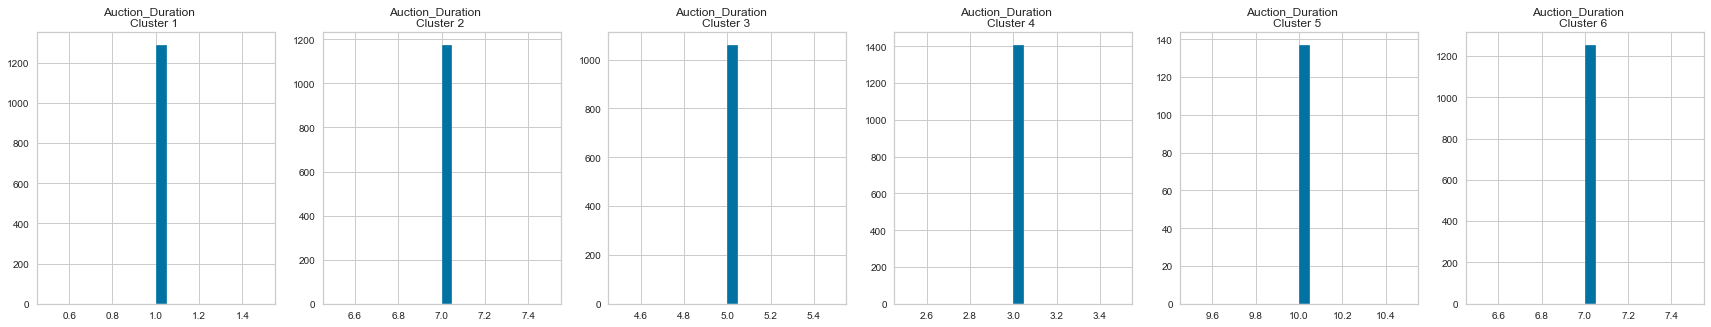

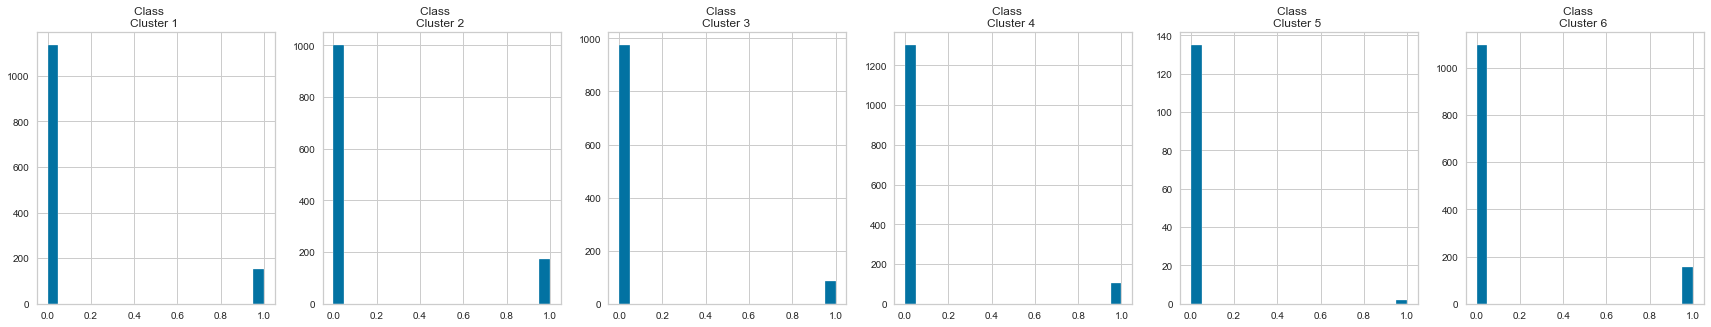

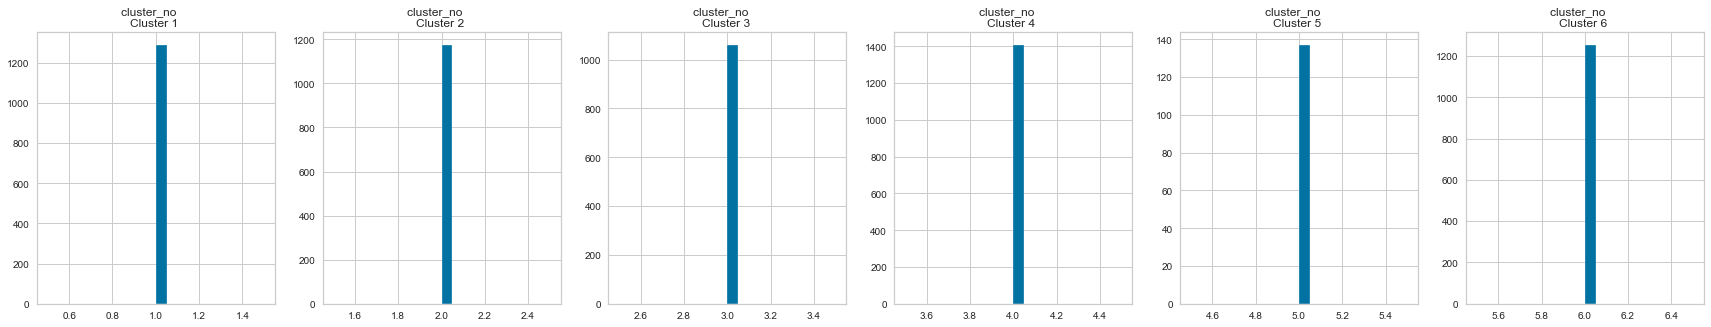

In [70]:
# Plot the histogram of various clusters
for i in dfa.columns:
  plt.figure(figsize = (35, 5))
  for j in range(1,7):
    plt.subplot(1,7,j+1)
    cluster = dfa[dfa['cluster_no'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  plt.show()